In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df=pd.read_csv('/content/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [120]:
df.shape

(1453, 15)

In [121]:
new_df = df.iloc[:, :11]
new_df = new_df.replace({"Yes": 1, "No": 0})
rounded_means = new_df.mean(axis=0).round(2)

print(rounded_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


<ipython-input-121-be6d95160bc1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.replace({"Yes": 1, "No": 0})


In [122]:
new_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [123]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(new_df)

std_devs = np.sqrt(pca.explained_variance_)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print('Standard Deviation\n ', std_devs)
print('Explained Variance Ration\n ',explained_variance_ratio )
print('cumulative_variance\n ', cumulative_variance)

Standard Deviation
  [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Explained Variance Ration
  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
cumulative_variance
  [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [124]:
components = pca.components_

# Create labels for the components
pc_labels = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
feature_labels = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Convert to DataFrame for easy viewing
rotation_df = pd.DataFrame(components.T, index=feature_labels, columns=pc_labels)

# Print standard deviations (rounded to 1 decimal)
print("Standard Deviations (rounded to 1 decimal):")
print(np.round(std_devs, 1))

# Print rotation (PCA loadings)
print("\nRotation (Principal Components):")
print(rotation_df.to_string(float_format='%.3f'))

Standard Deviations (rounded to 1 decimal):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (Principal Components):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10   PC11
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572  0.110 -0.045
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018  0.666  0.542
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400  0.076 -0.142
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161  0.005 -0.251
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003 -0.009 -0.002
fast        0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166 -0.240 -0.339
cheap       0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076 -0.428  0.489
tasty       0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639 -0.079 -0.020
expensive  -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067 -0.454  0.

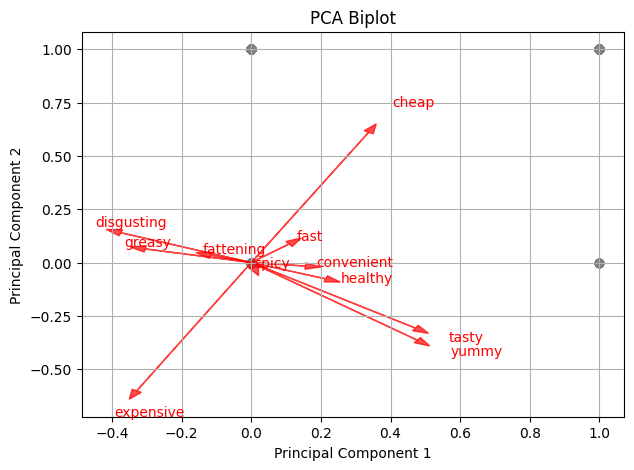

In [125]:
plt.scatter(new_df.iloc[:, 0], new_df.iloc[:, 1], color='grey', alpha=0.6)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for i, feature in enumerate(feature_labels):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', head_width=0.03, alpha=0.7)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2,
             feature, color='red')

plt.title("PCA Biplot")
plt.grid()
plt.show()

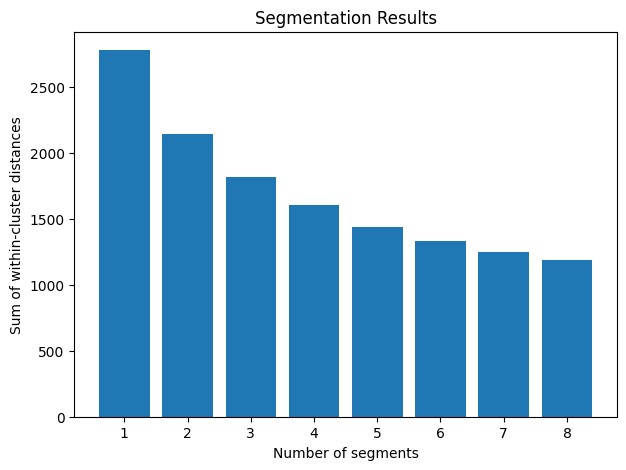

In [126]:
from sklearn.cluster import KMeans

np.random.seed(1234)  # Replace with your data

num_segments = range(1, 9)
within_cluster_distances = []
MD_df = {}

for k in num_segments:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(new_df)
    within_cluster_distances.append((model.inertia_))
    MD_df[str(k)] = model

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


<ipython-input-127-cedd2aa6f8bf>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([MD_b28[k] for k in num_segments], labels=num_segments, patch_artist=True)


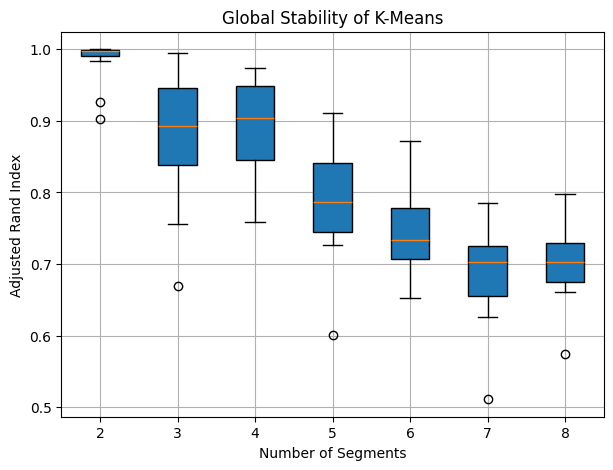

In [127]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from joblib import Parallel, delayed  # Add these imports

# Assuming new_df is already a NumPy array
#MD_x = new_df  # No need to call .values

# Parameters
num_segments = range(2, 9)
nrep, nboot = 5, 20  # Reduce the number of repetitions and bootstrap samples

# Function to perform clustering and compute ARI
def bootstrap_and_cluster(k, data, nrep):
    boot_sample = resample(data)
    scores = []
    for _ in range(nrep):
        # Use higher n_init for stability
        model = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(0, 1000))  # n_init increased to 10
        labels = model.fit_predict(boot_sample)
        other_model = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(0, 1000))
        other_labels = other_model.fit_predict(boot_sample)
        scores.append(adjusted_rand_score(labels, other_labels))
    return np.mean(scores)

# Stability analysis
def stability_analysis(data, num_segments, nrep, nboot):
    stability = {}
    for k in num_segments:
        stability[k] = Parallel(n_jobs=-1)(delayed(bootstrap_and_cluster)(k, data, nrep) for _ in range(nboot))
    return stability

# Perform clustering and stability analysis
MD_b28 = stability_analysis(new_df, num_segments, nrep, nboot)

# Plot the ARI results
plt.boxplot([MD_b28[k] for k in num_segments], labels=num_segments, patch_artist=True)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of K-Means")
plt.grid(True)
plt.show()

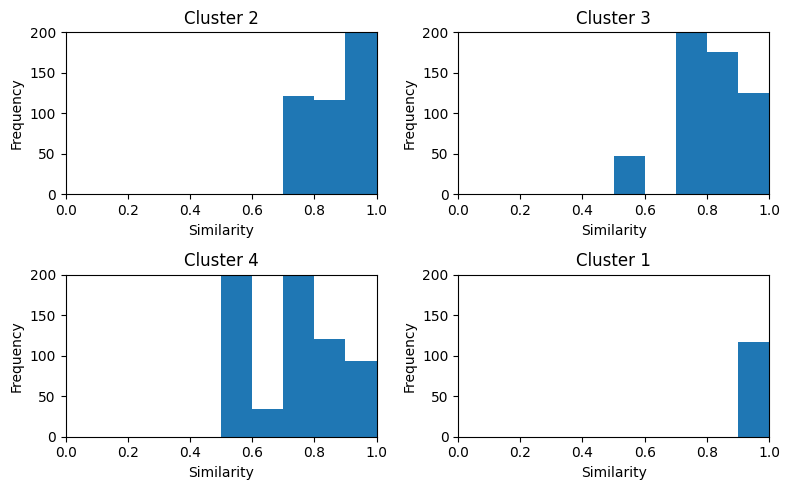

In [128]:
num_segments = range(1, 5)
num_bins = 10
range_values = (0, 1)
max_frequency = 200

# Initialize the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Apply KMeans clustering and compute similarity
for i in num_segments:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(new_df)

    # Predict cluster labels for the data
    labels = kmeans.predict(new_df)

    # Calculate similarity as the distance from each point to the nearest cluster centroid
    similarities = np.min(kmeans.transform(new_df), axis=1)  # Minimum distance to each cluster center

    # Determine the position of the subplot
    row = (i - 2) // 2
    col = (i - 2) % 2

    # Plot the histogram for each cluster
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Set x-ticks
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust layout for a cleaner plot
plt.tight_layout()
plt.show()

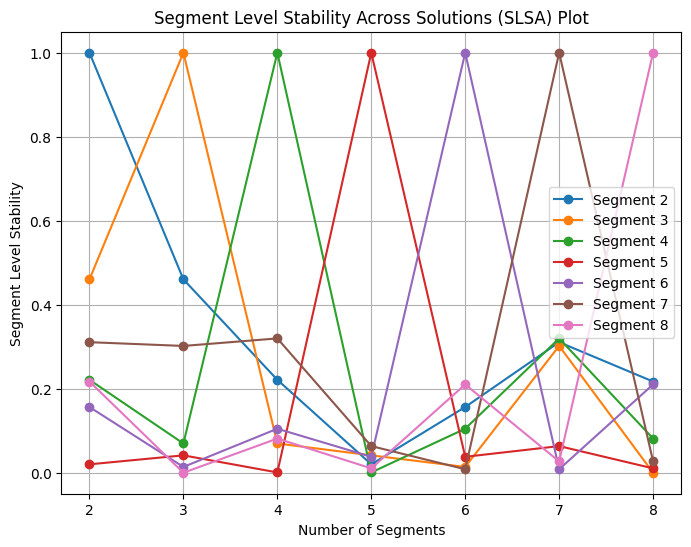

In [129]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_df[str(segment)].predict(new_df)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


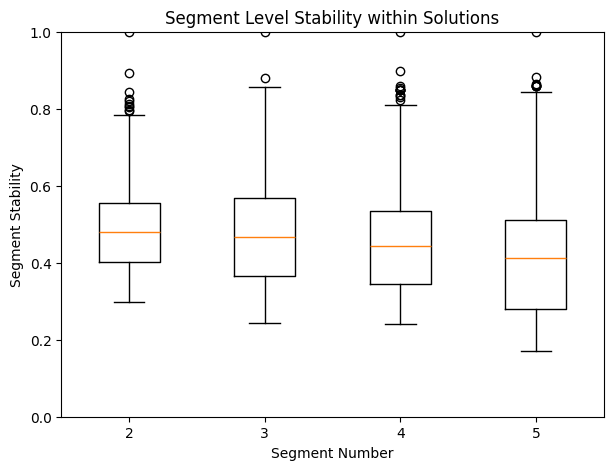

In [130]:
# First part: Segment Level Stability within Solutions (SLSW) for multiple segment solutions

segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_df[segment].predict(new_df)
    segment_similarities[segment] = MD_df[segment].transform(new_df).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Plot the SLSW boxplot
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()





Best number of clusters: 8
Best GMM model: GaussianMixture(n_components=8, random_state=1234)


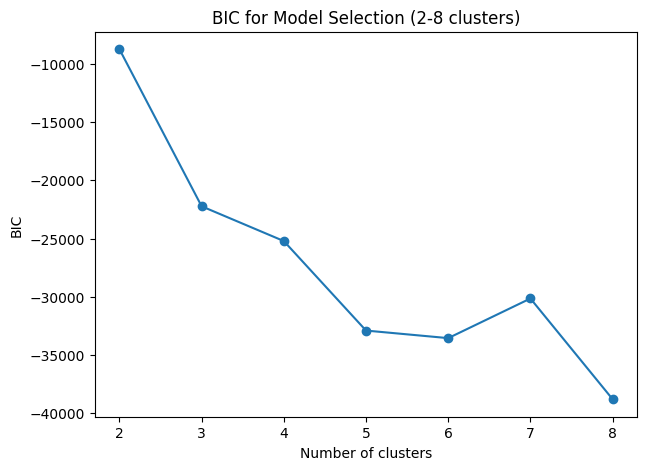

In [131]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming MD_x is your input data as a NumPy array or pandas DataFrame
MD_x = new_df  # Example binary data, replace with your actual data

# Create a list to store models and their BIC values for model selection
bic_values = []
models = []

# Loop to fit models from 2 to 8 clusters
for n_clusters in range(2, 9):
    gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
    gmm.fit(MD_x)
    bic_values.append(gmm.bic(MD_x))  # BIC to evaluate model performance
    models.append(gmm)

# Select the best model based on BIC
best_model_index = np.argmin(bic_values)
best_model = models[best_model_index]
best_n_clusters = best_model_index + 2  # Since range starts from 2 clusters

print(f"Best number of clusters: {best_n_clusters}")
print("Best GMM model:", best_model)

# Plot BIC values to visualize the model selection process
plt.plot(range(2, 9), bic_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC for Model Selection (2-8 clusters)')
plt.show()


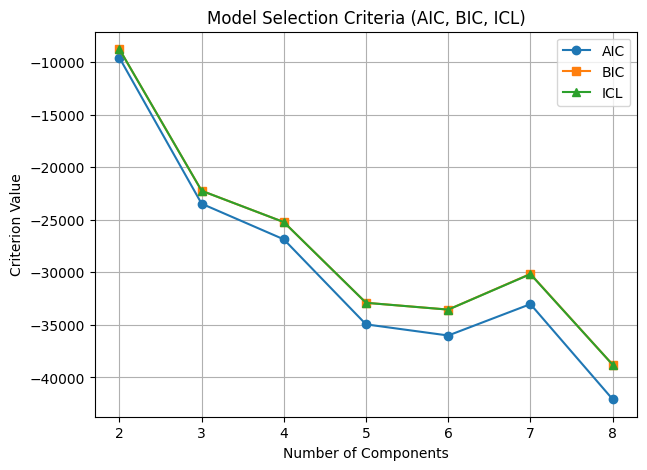

In [132]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Example data (replace with your actual data)
MD_x = new_df  # Replace with actual data

# Initialize variables
aic_values = []
bic_values = []
icl_values = []
models = []

# Fit Gaussian Mixture Models for k = 2 to 8
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)

    # AIC and BIC
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

    # Compute entropy
    probabilities = gmm.predict_proba(MD_x)
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9))

    # ICL = BIC - Entropy
    icl_values.append(gmm.bic(MD_x) - entropy)

    models.append(gmm)

# Plot the criteria for visualization
import matplotlib.pyplot as plt

num_components = range(2, 9)
plt.plot(num_components, aic_values, marker='o', label='AIC')
plt.plot(num_components, bic_values, marker='s', label='BIC')
plt.plot(num_components, icl_values, marker='^', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.title('Model Selection Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()


In [133]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(new_df)
kmeans_clusters = kmeans.predict(new_df)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(new_df)
gmm_clusters = gmm.predict(new_df)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = new_df[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [134]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(new_df)

log_likelihood_m4a = gmm_m4a.score(new_df)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(new_df)

log_likelihood_m4 = gmm_m4.score(new_df)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


In [135]:
like_counts = df['Like'].value_counts()
reversed_counts = like_counts[::-1]

print(reversed_counts)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [136]:
# Define the mapping of strings to numbers
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Apply the mapping to the 'Like' column
df['Like_mapped'] = df['Like'].map(like_mapping)

like_n_counts = df['Like_mapped'].value_counts()
print(like_n_counts)

Like_mapped
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64


In [137]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [138]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


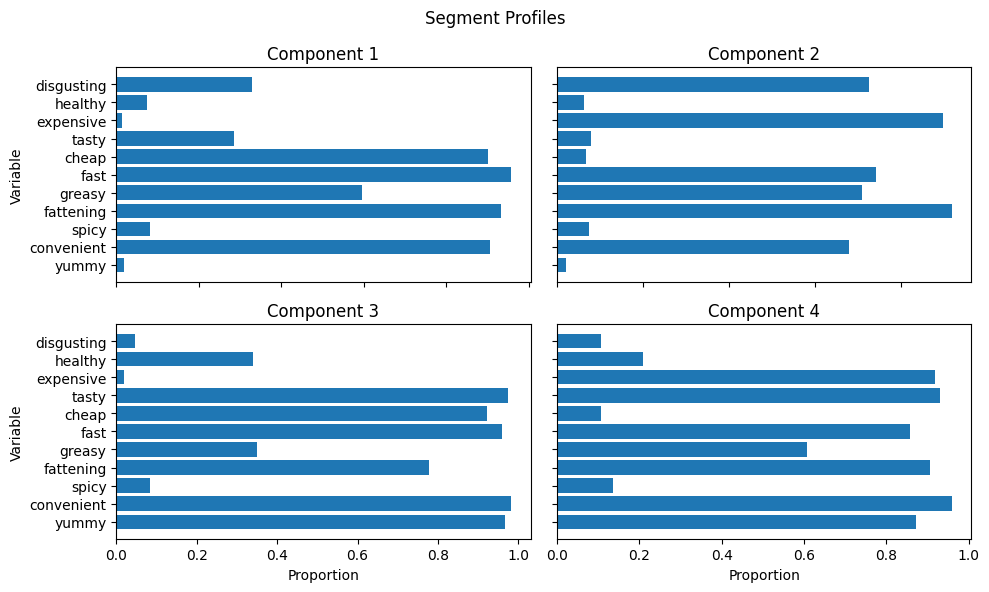

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_df['4']

labels = kmeans.labels_

MD_mean = new_df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(new_df.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


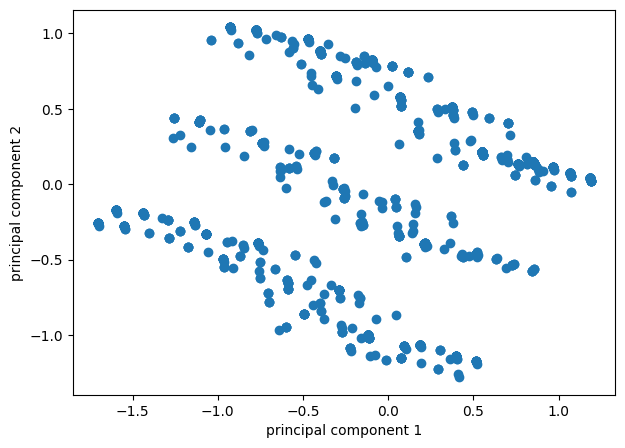

In [140]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(new_df)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(new_df)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

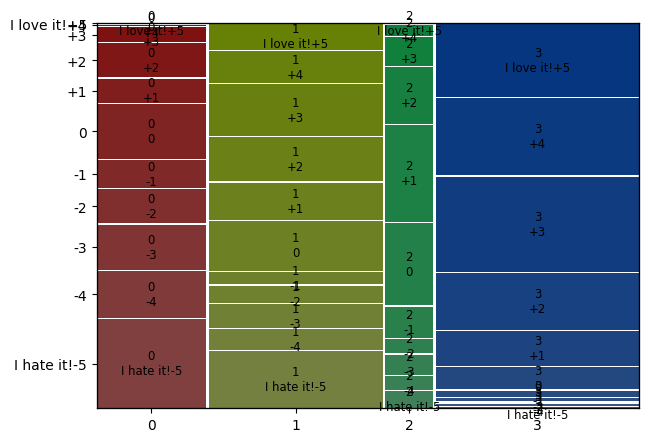

In [141]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df
df_eleven = df.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
df
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

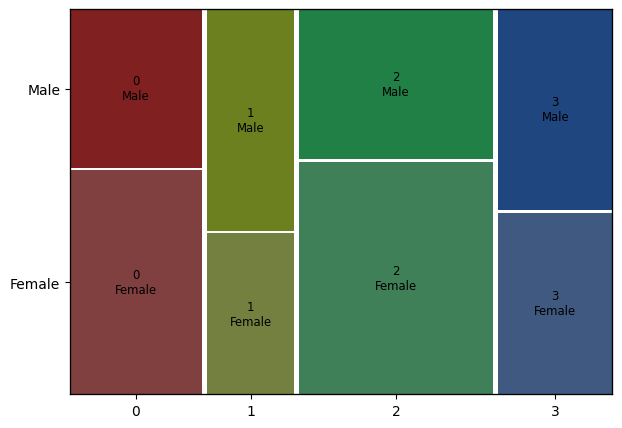

In [142]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_df['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

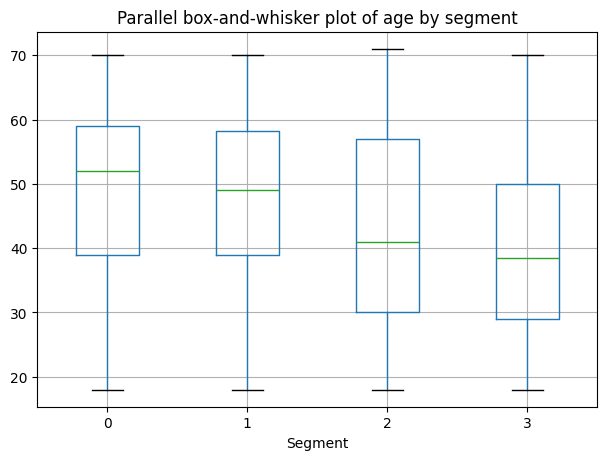

In [143]:
df1 = pd.DataFrame({'Segment': k4, 'Age': df['Age']})

df1.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [144]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [145]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [146]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


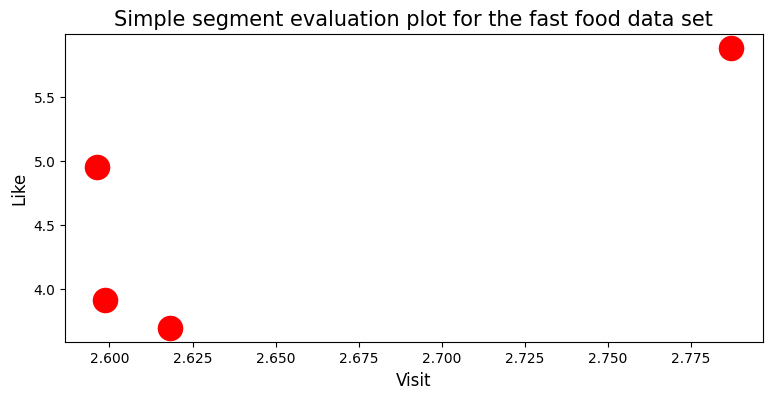

In [147]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()